In [1]:
from eval_process import WheelEvalProcess
encoder_path = 'weights/encoder_v0202.pth'
decoder_path = 'weights/decoder_v0202.pth'
umap_path = 'weights/umap_model_d3.pkl'
cand_path = 'DB/cands/cand_path.npy'
cand_piece = 'DB/cands/cand_piece.npy'
cand_emb = 'DB/cands/cand_emb.npy'
wep = WheelEvalProcess(encoder_path, decoder_path, umap_path, cand_path, cand_piece, cand_emb)

2023-05-03 14:50:36.140624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 14:50:36.846483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/EILIE/.local/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-05-03 14:50:36.846546: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/EILIE/.local/l

In [9]:
len(wep.cand_path)

32064

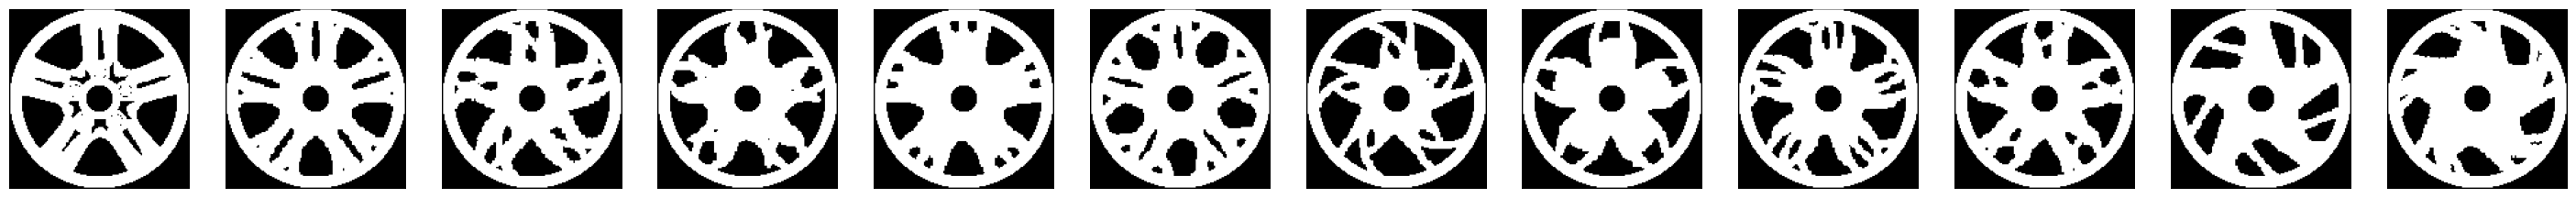

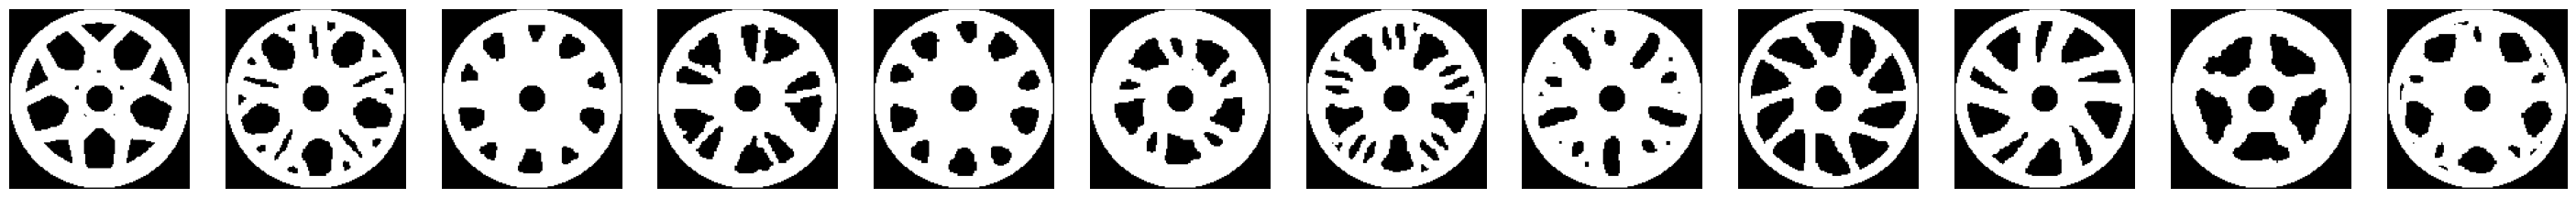

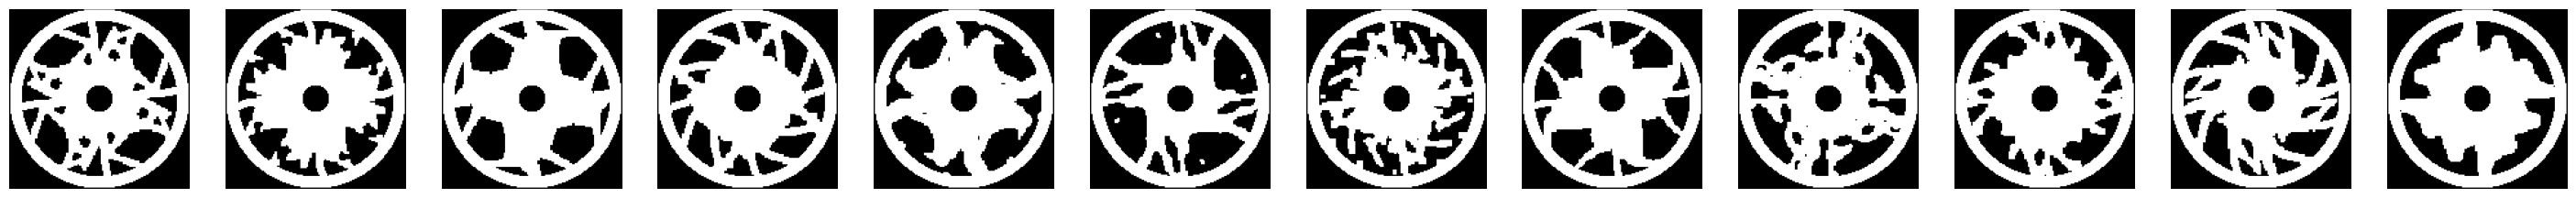

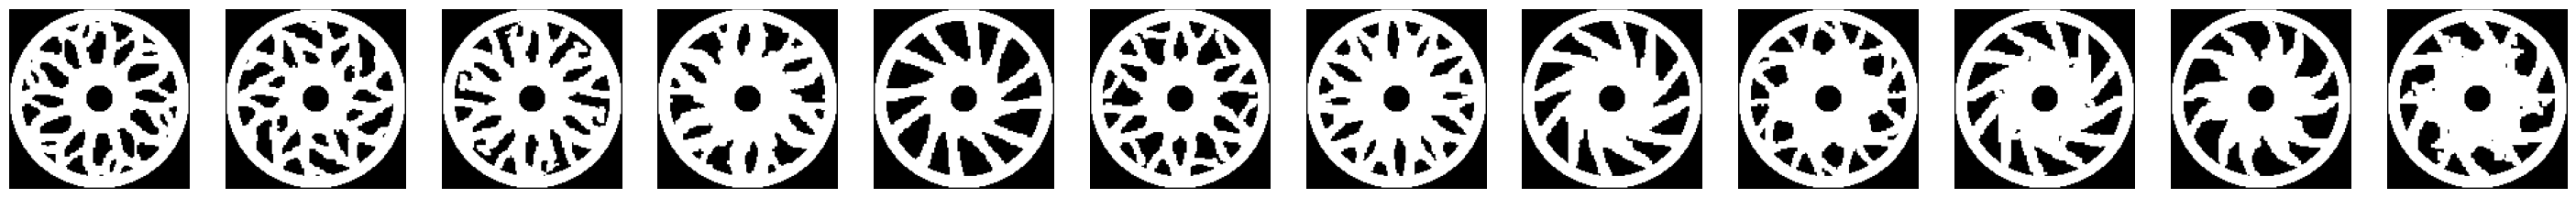

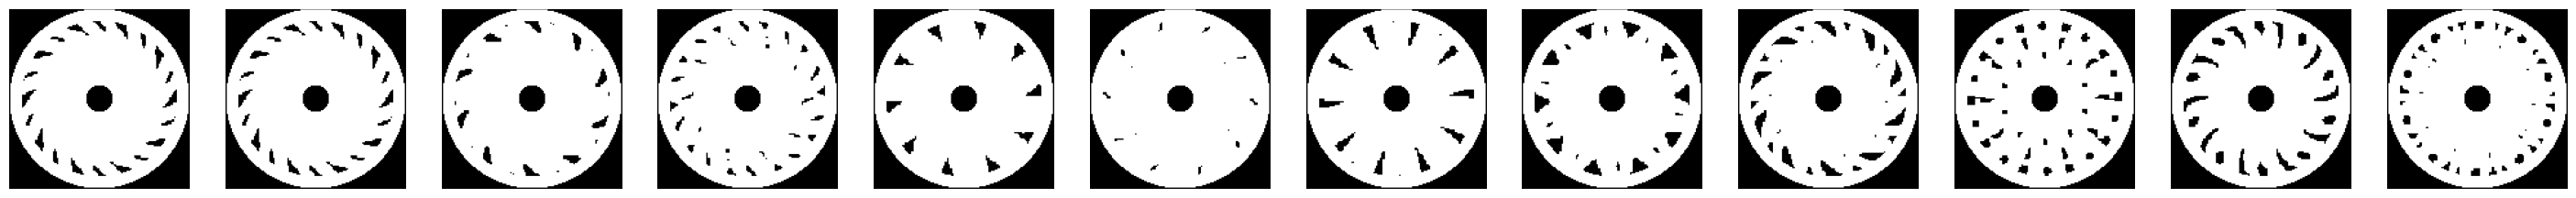

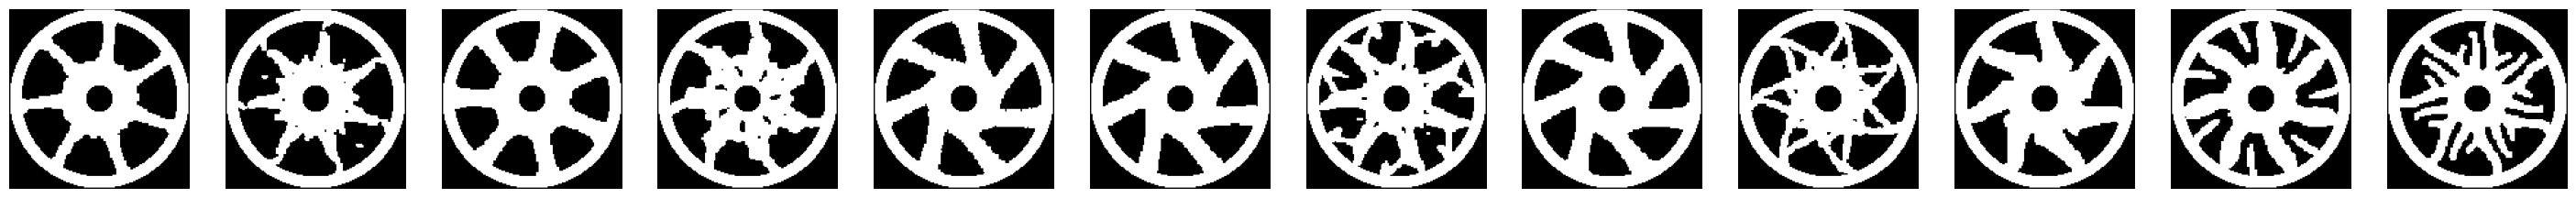

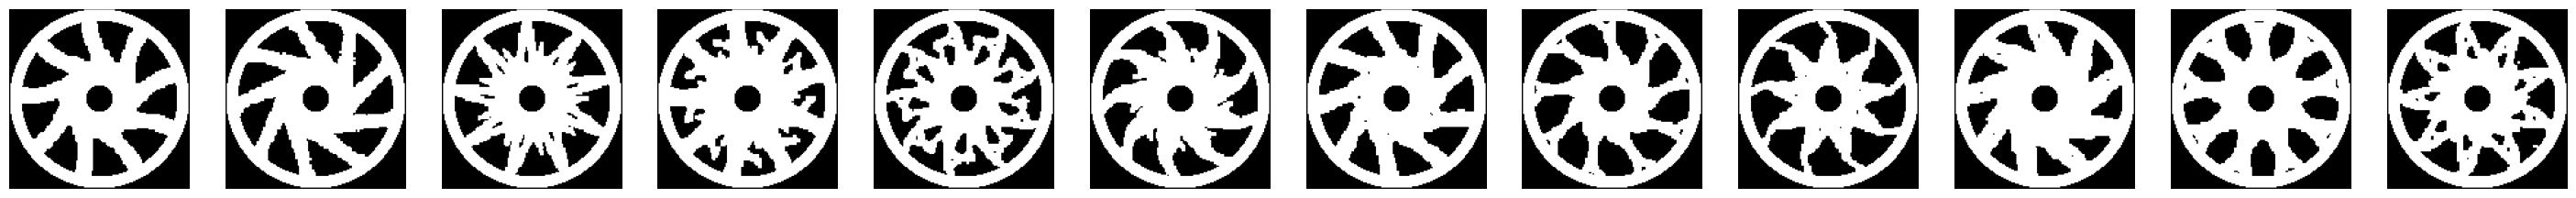

In [2]:
from data_utils import show_imgs, get_wheel_img, get_slice_label

test_paths = ['DB/wheel_test1.jpg', 'DB/wheel_test2.jpg', 
              'DB/wheel_org/27_0.5908_0.26_0.94__4.jpg', 'DB/wheel_org/52_4_0.2_1.1__6.jpg',
             'DB/wheel_org/91_1.5001_0.09_1.01__10.jpg',
             'DB/wheel_org/111_3.9084_0.12_0.97__7.jpg',
             'DB/wheel_org/73_1.8684_0.07_0.91__9.jpg']

for path in test_paths:
    label = get_slice_label([path])[0]    
    x = wep.path2process(path)
    x_input = wep.make_input(x, label)
    x_emb = wep.eval(x_input)
    sim_imgs = wep.find_sim(x_input[0,0].numpy(), x_emb, label, 11, img_w=10.)
    wheel_imgs = list(map(lambda sim_img: get_wheel_img(sim_img, 128, 140, 0.15), [x]+sim_imgs))
    show_imgs(wheel_imgs, r=1)

In [6]:
len(img_diff), len(emb_diff)

(6287, 6287)